<a href="https://colab.research.google.com/github/bejoyjose1993/Deep-Learning/blob/master/Text_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PART 1 - Text Reconstruction Application**

---

# **Dence Network**

**Basic Dense Network**

--

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True
Epoch 1/20. Loss: 9.389966011047363
Epoch 2/20. Loss: 5.975910186767578
Epoch 3/20. Loss: 5.484451770782471
Epoch 4/20. Loss: 5.2382659912109375
Epoch 5/20. Loss: 5.132998466491699
Epoch 6/20. Loss: 5.04633903503418
Epoch 7/20. Loss: 4.987010955810547
Epoch 8/20. Loss: 4.928111553192139
Epoch 9/20. Loss: 4.887776851654053
Epoch 10/20. Loss: 4.871705055236816
Epoch 11/20. Loss: 4.825455665588379
Epoch 12/20. Loss: 4.8199782371521
Epoch 13/20. Loss: 4.809317111968994
Epoch 14/20. Loss: 4.781755447387695
Epoch 15/20. Loss: 4.780313968658447
Epoch 16/20. Loss: 4.7605109214782715
Epoch 17/20. Loss: 4.74934720993042
Epoch 18/20. Loss: 4.7496442794799805
Epoch 19/20. Loss: 4.73276948928833
Epoch 20/20. Loss: 4.735046863555908


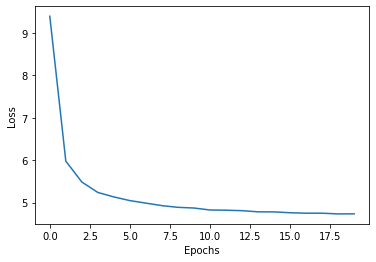

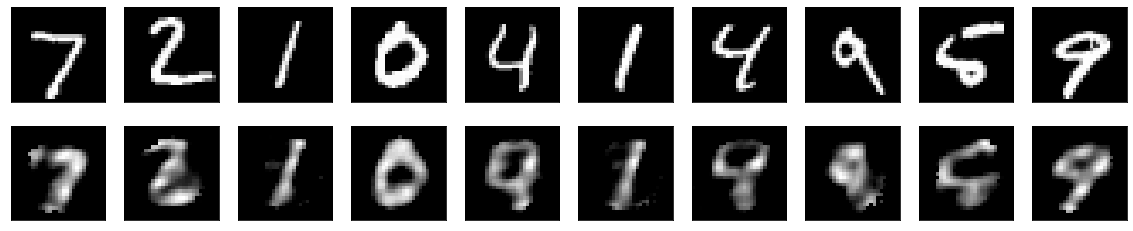

In [ ]:
#importing the libraries 
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

#Define an encoder layer
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

#Define a decoder layer
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

#Build the autoencoder model
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

#Reconstruction Loss error
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#Forward pass and optimization
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

#The training loop
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))  

#Process the dataset    
from sklearn.metrics import accuracy_score

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))


training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

# Basic Model Call
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model, opt, loss, training_dataset, 20)


#Plot the loss Vs Epoch
plt.plot(range(20), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
#learning_rate=1e-3 ,intermediate_dim=512


#Prediction Output
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#learning_rate=1e-3 ,intermediate_dim=512



---

--

**Complex Dense Network- Best (Model 1)**

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True
Epoch 1/20. Loss: 15.861479759216309
Epoch 2/20. Loss: 10.415462493896484
Epoch 3/20. Loss: 7.708052635192871
Epoch 4/20. Loss: 6.059676647186279
Epoch 5/20. Loss: 5.004060745239258
Epoch 6/20. Loss: 4.250009059906006
Epoch 7/20. Loss: 3.6833529472351074
Epoch 8/20. Loss: 3.2489845752716064
Epoch 9/20. Loss: 2.9330310821533203
Epoch 10/20. Loss: 2.6813454627990723
Epoch 11/20. Loss: 2.477851390838623
Epoch 12/20. Loss: 2.303541421890259
Epoch 13/20. Loss: 2.1471357345581055
Epoch 14/20. Loss: 2.0108065605163574
Epoch 15/20. Loss: 1.8912996053695679
Epoch 16/20. Loss: 1.7850067615509033
Epoch 17/20. Loss: 1.6906566619873047
Epoch 18/20. Loss: 1.6064984798431396
Epoch 19/20. Loss: 1.530874490737915
Epoch 20/20. Loss: 1.4626356363296509


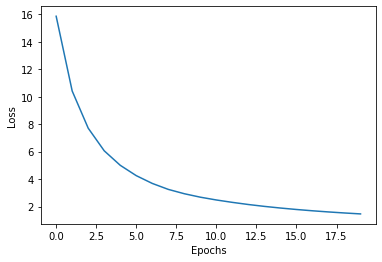

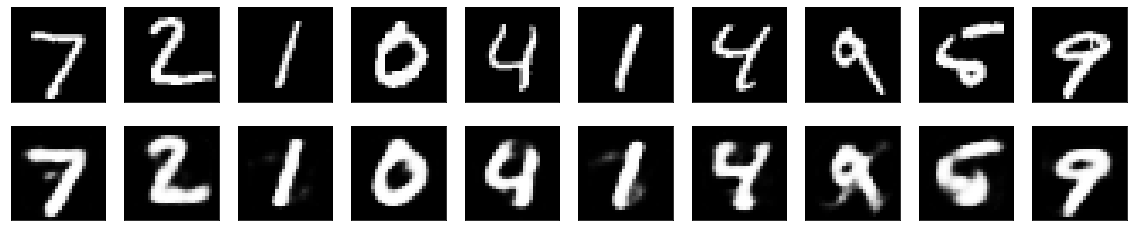

In [ ]:
#importing the libraries 
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

#Define an encoder layer
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.sigmoid)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.sigmoid)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

#Define a decoder layer
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.sigmoid)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

#Build the autoencoder model
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

#Reconstruction Loss error
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#Forward pass and optimization
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

#The training loop
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))  

#Process the dataset    
from sklearn.metrics import accuracy_score

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))


training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)



# Complex Model By changing intermediate layer and learning reates
model = Autoencoder(intermediate_dim=512, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
train_loop(model, opt, loss, training_dataset, 20)


#Plot the loss Vs Epoch
plt.plot(range(20), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
#learning_rate=1e-3 ,intermediate_dim=512


#Prediction Output
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#learning_rate=1e-3 ,intermediate_dim=512



--

**Complex Dense Network- Best (Model 2)**

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True
Epoch 1/20. Loss: 4.811588287353516
Epoch 2/20. Loss: 2.061939001083374
Epoch 3/20. Loss: 1.634281873703003
Epoch 4/20. Loss: 1.4456558227539062
Epoch 5/20. Loss: 1.3493993282318115
Epoch 6/20. Loss: 1.2483686208724976
Epoch 7/20. Loss: 1.2221087217330933
Epoch 8/20. Loss: 1.1833029985427856
Epoch 9/20. Loss: 1.1490882635116577
Epoch 10/20. Loss: 1.1444348096847534
Epoch 11/20. Loss: 1.1046807765960693
Epoch 12/20. Loss: 1.0857688188552856
Epoch 13/20. Loss: 1.064314365386963
Epoch 14/20. Loss: 1.0498396158218384
Epoch 15/20. Loss: 1.0958566665649414
Epoch 16/20. Loss: 1.023940920829773
Epoch 17/20. Loss: 1.028550148010254
Epoch 18/20. Loss: 1.016374111175537
Epoch 19/20. Loss: 1.03224515914917
Epoch 20/20. Loss: 1.0020016431808472


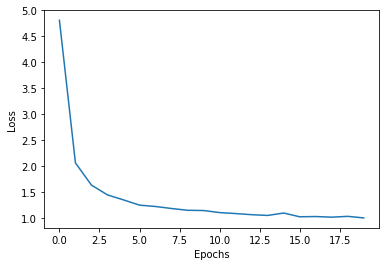

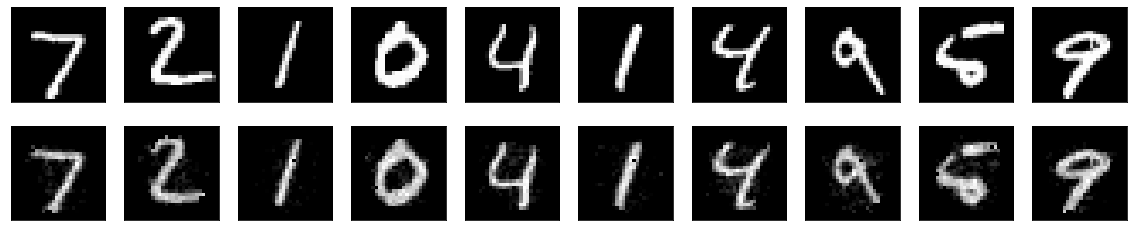

In [ ]:
#importing the libraries 
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

#Define an encoder layer
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

#Define a decoder layer
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

#Build the autoencoder model
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

#Reconstruction Loss error
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#Forward pass and optimization
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

#The training loop
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))  

#Process the dataset    
from sklearn.metrics import accuracy_score

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))


training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)
# Complex Model By changing intermediate layer and learning reates
model = Autoencoder(intermediate_dim=512, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
train_loop(model, opt, loss, training_dataset, 20)


#Plot the loss Vs Epoch
plt.plot(range(20), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
#learning_rate=1e-3 ,intermediate_dim=512


#Prediction Output
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#learning_rate=1e-3 ,intermediate_dim=512



---

***CNN MODELS***

---

--

Basic CNN MODEL Filter Size (16,8,8) Kernal (3,3)

Epoch 1/50
469/469 [==============================] - 3s 7ms/step - loss: 0.6924 - val_loss: 0.6894
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6859 - val_loss: 0.6820
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6767 - val_loss: 0.6703
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6598 - val_loss: 0.6462
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6194 - val_loss: 0.5831
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5330 - val_loss: 0.4969
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4833 - val_loss: 0.4810
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4726 - val_loss: 0.4724
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4643 - val_loss: 0.4641
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4560 - val_loss: 0.4556

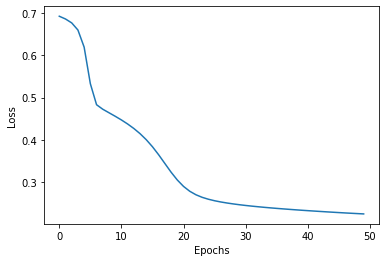

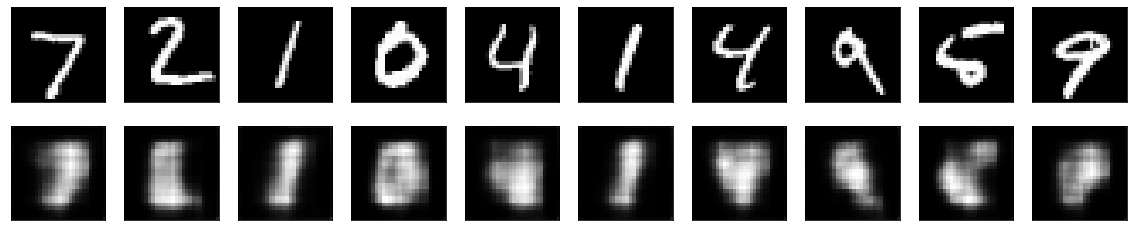

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])




# For Displaying Plot
plt.plot(range(50), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# For Displaying Output
pred = autoencoder.predict(x_test)
pred = autoencoder.predict(x_test)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---

--

**Complex CNN MODEL Filter Size (64,32,32,32) Kernal (3,3)**

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0   

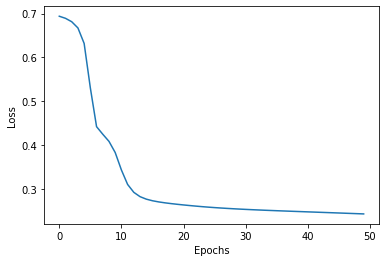

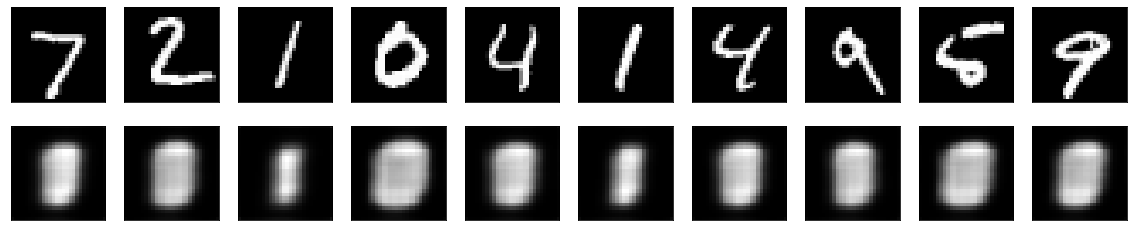

In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

# Changing Kernal Size
x = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same')(x) #Changing Kernal Size
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
#x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same')(x) #Changing Kernal Size
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
#x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same')(x) #Changing Kernal Size
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = tf.keras.layers.UpSampling2D((2, 2))(x)
#x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same')(x) #Changing Kernal Size
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x) 
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()


# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])




# For Displaying Plot
plt.plot(range(50), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# For Displaying Output
pred = autoencoder.predict(x_test)
pred = autoencoder.predict(x_test)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---

--

**Complex CNN MODEL Filter Size (128,64,64) Kernal (3,3)**

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0   

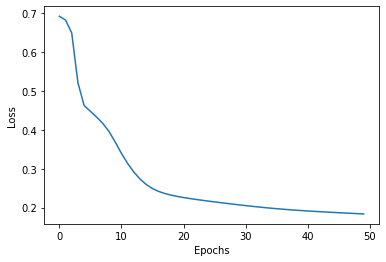

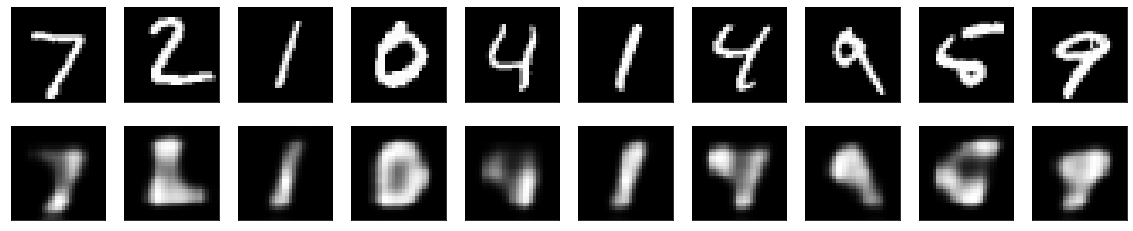

In [ ]:
from keras import regularizers
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format


x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics="accuracy")
autoencoder.summary()

#Importing Data
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#Calling Model
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

# Plot Graph
plt.plot(range(50), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Input V/S Output
pred = autoencoder.predict(x_test)
pred = autoencoder.predict(x_test)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---

--

**Complex CNN MODEL Filter Size (128,64,64) Kernal (3,3)** With keras.library

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 32)          0   

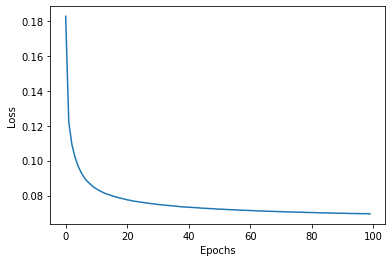

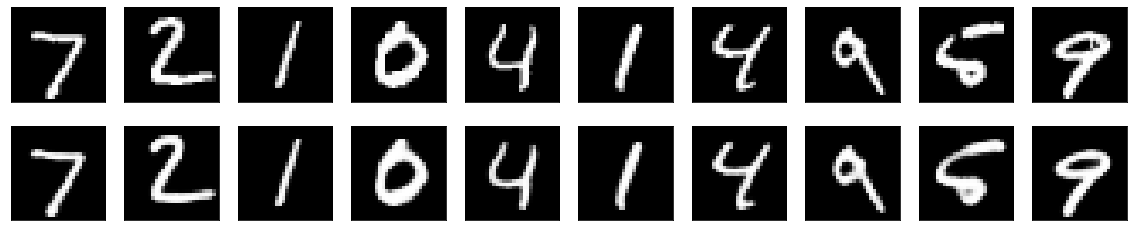

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


from keras.callbacks import TensorBoard

history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


# Plot Graph
plt.plot(range(100), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Input V/S Output
pred = autoencoder.predict(x_test)
pred = autoencoder.predict(x_test)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# ---------x--- END OF PART 1---x---------

---

## **PART 2 - Denoising**

---

--

**Basic Dense Layer**

In [ ]:
from keras.datasets import mnist
from keras.layers import Input
import matplotlib.pyplot as plt
import numpy as np

# Loading DAta and introducing Noise
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = x_train_noisy.astype(np.float32)
x_test_noisy = x_test_noisy.astype(np.float32)

x_train_noisy = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_test_noisy = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


input_img = tf.keras.layers.Input(shape=(784,))
print (input_img.shape)

encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
output_encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(output_encoded)
output_decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = tf.keras.models.Model(input_img, output_decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


# For Displaying Plot
plt.plot(range(100), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


# For Displaying Output
#pred = autoencoder.predict(x_test_noisy)
pred = autoencoder.predict(x_test_noisy)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---

--

**Using Multi Dense layer for Denoising.**

In [ ]:
from keras.datasets import mnist
from keras.layers import Input
import matplotlib.pyplot as plt
import numpy as np

# Loading DAta and introducing Noise
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = x_train_noisy.astype(np.float32)
x_test_noisy = x_test_noisy.astype(np.float32)

x_train_noisy = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_test_noisy = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


input_img = tf.keras.layers.Input(shape=(784,))
print (input_img.shape)

encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(64, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


# For Displaying Plot
plt.plot(range(100), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


# For Displaying Output
#pred = autoencoder.predict(x_test_noisy)
pred = autoencoder.predict(x_test_noisy)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---

--

**Basic CNN for Denoising.**

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#Basic CNN Model
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


# Loading DAta and introducing Noise
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#Denosing using The Basic CNN Model

history = autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

# For Displaying Plot
plt.plot(range(100), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


# For Displaying Output
#pred = autoencoder.predict(x_test)
pred = autoencoder.predict(x_test_noisy)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---

--

**Using Complex CNN for Denoising.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input
from keras.models import Model
from keras import backend as K

input_img = tf.keras.layers.Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

# Loading DAta and introducing Noise
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



from keras.callbacks import TensorBoard

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='/tmp/autoencoder')])


# Plot Graph
plt.plot(range(100), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Input V/S Output
#pred = autoencoder.predict(x_test)
pred = autoencoder.predict(x_test_noisy)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

---

--

**Using Complex CNN (Keras) for Denoising.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

# Loading DAta and introducing Noise
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



from keras.callbacks import TensorBoard

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


# Plot Graph
plt.plot(range(100), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Input V/S Output
#pred = autoencoder.predict(x_test)
pred = autoencoder.predict(x_test_noisy)
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(pred[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# ---------x--- END OF PART 2---x---------